# Our original Ovenbird song

In [1]:
from IPython.display import Audio, Image

# Provide the path to the .wav file
Audio('./data/ovenbird.wav')

# Shorten the wav to 30 seconds

In [2]:
from pydub import AudioSegment
import os

def extract_first_30_seconds(input_file: str, output_file: str):
    """
    Extracts the first 30 seconds from a .wav file and saves it as a new .wav file.

    Args:
        input_file (str): Path to the input .wav file.
        output_file (str): Path to save the output .wav file.
    """
    try:
        # Load the audio file
        audio = AudioSegment.from_wav(input_file)

        # Get the first 30 seconds (30 * 1000 milliseconds)
        first_30_seconds = audio[:30 * 1000]

        # Export the audio
        first_30_seconds.export(output_file, format="wav")
        print(f"Saved the first 30 seconds to {output_file}")

    except Exception as e:
        print(f"An error occurred: {e}")

input_wav_file = os.path.join(os.getcwd(), 'data', 'ovenbird.wav')
output_wav_file = os.path.join(os.getcwd(), 'data', 'short_ovenbird.wav')
extract_first_30_seconds(input_wav_file, output_wav_file)

Saved the first 30 seconds to /Users/carlybates/Desktop/github/Warbler-Net/demo/data/short_ovenbird.wav


In [3]:
Audio("./data/short_ovenbird.wav")

# Convert wav to spectrogram

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def generate_spectrogram(wav_file, output_folder):
    """
    Generates a spectrogram from a WAV file and saves it as an image.

    Args:
        wav_file (str): Path to the input WAV file.
        output_folder (str): Folder where the spectrogram image will be saved.
    """
    # Read the WAV file
    sample_rate, data = wavfile.read(wav_file)

    # If the file is stereo, take only one channel
    if len(data.shape) > 1:
        data = data[:, 0]

    # Generate the spectrogram
    plt.specgram(data, Fs=sample_rate, cmap="viridis")

    # Extract the file name without extension
    file_name = os.path.splitext(os.path.basename(wav_file))[0]

    # Save the spectrogram as an image
    output_path = os.path.join(output_folder, f"{file_name}_spectrogram.png")
    plt.axis("off")  # Turn off axes for a cleaner image
    plt.savefig(output_path, bbox_inches="tight", pad_inches=0)
    plt.close()
    print(f"Spectrogram saved: {output_path}")

generate_spectrogram("./data/short_ovenbird.wav", "./data")

Spectrogram saved: ./data/short_ovenbird_spectrogram.png


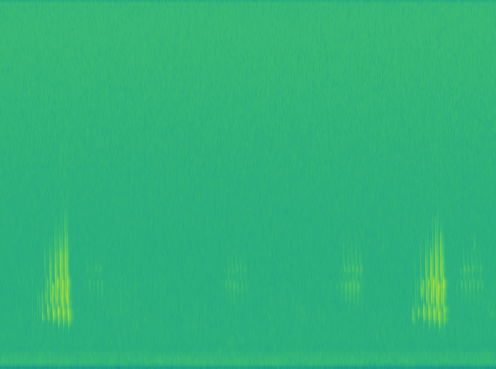

In [5]:
Image(filename='./data/short_ovenbird_spectrogram.png') 

# Convert image to (224, 224, 3) array

In [6]:
from PIL import Image
import numpy as np

# Load the image
image_path = './data/short_ovenbird_spectrogram.png'
img = Image.open(image_path)

img = img.convert('RGB')

img = img.resize((224, 224))

img_array = np.array(img) / 255.0

img_array = np.expand_dims(img_array, axis=0) 

np.shape(img_array)

(1, 224, 224, 3)

# Classify the spetrogram

In [7]:
from os.path import dirname, abspath
d = os.path.join(dirname(abspath(os.getcwd())) + '/data/spectrograms_windowed_dataset')


In [8]:
from tensorflow import keras
import os

data_dir = os.path.join(dirname(abspath(os.getcwd())) + '/spectrograms_windowed_dataset')
class_names = sorted(os.listdir(data_dir))
class_names = [name for name in class_names if os.path.isdir(os.path.join(data_dir, name))]

def decode_label(label):
    return class_names[label]

model = keras.models.load_model('../src/model/model.keras')

prediction = model.predict(img_array, verbose=0)
predicted_label = np.argmax(prediction, axis=1)[0]

print(f"True Class: Ovenbird")
print(f"Predicted Class: {decode_label(predicted_label)}")

True Class: Ovenbird
Predicted Class: Ovenbird


/opt/anaconda3/envs/ugh/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
